# Mnist data

In [73]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import pandas as pd

## load data

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

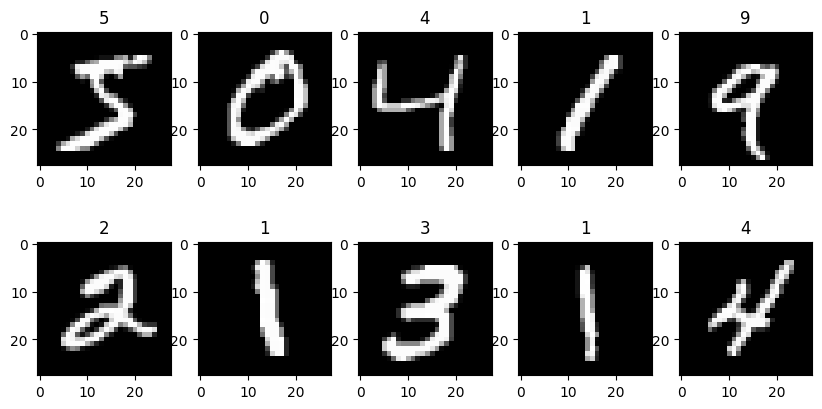

In [88]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
plt.show()

## Flatten and Normalize

In [89]:
X_train = X_train.reshape(-1, 784) / 255
X_test = X_test.reshape(-1, 784) / 255


In [90]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 784), (60000,), (10000, 784), (10000,))

In [91]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()


(0.0, 1.0, 0.0, 1.0)

In [92]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [93]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [95]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Model

In [96]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

> First Hidden Layer
* No. of inputs:  784
* No. of neurons in hidden layer 1:  128
* Total No. of Parameters:  784*128 (Input-hidden1 weights) + 128 (hidden1 biases)= 100,480

> Second Hidden Layer
* No. of inputs:  128
* No. of neurons in hidden layer 2:  64
* Total No. of Parameters:  128*64 (hidden1-hidden2 weights) + 64 (hidden2 biases)= 8,256

> Output Layer
* No. of inputs:  64
* No. of neurons in output layer:  10
* Total No. of Parameters:  64*10 (hidden2-output weights) + 10 (output biases)= 650

> Total No. of Parameters:  100480+8256+650= 109386

## Alternative Model Building

1. Define then add layers with activation
```
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
 ```


2. Define then add layers wthout activation
```
from tensorflow.keras.layers import Activation
model = Sequential()
model.add(Dense(64, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
```


3. Functional API syntax
```
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
inputs = Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)
```

In [97]:
model.fit(X_train, y_train, epochs=10, batch_size=32)
print("Training complete.\n")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8746 - loss: 0.4255
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9668 - loss: 0.1079
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9783 - loss: 0.0704
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9850 - loss: 0.0470
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9879 - loss: 0.0400
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9904 - loss: 0.0309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0257
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9930 - loss: 0.0213
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0199
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9943 - loss: 0.0171
Training complete.



In [98]:
print("Evaluating the model on test data...")
model.evaluate(X_test, y_test)

Evaluating the model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0988


[0.07987143844366074, 0.9810000061988831]

In [99]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=10, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9914 - val_loss: 0.0261
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9954 - loss: 0.0131 - val_accuracy: 0.9945 - val_loss: 0.0183
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9974 - loss: 0.0093 - val_accuracy: 0.9927 - val_loss: 0.0216
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9963 - loss: 0.0100 - val_accuracy: 0.9921 - val_loss: 0.0261
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9971 - loss: 0.0090 - val_accuracy: 0.9873 - val_loss: 0.0458
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9863 - val_loss: 0.0429
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accuracy: 0.9917 - val_loss: 0.0294
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9967 - loss: 0.0099 - 

In [100]:
print(history.params)

{'verbose': 'auto', 'epochs': 10, 'steps': 1500}


In [101]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [102]:
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.994937,0.015262,0.991417,0.026073
1,0.995313,0.013749,0.994500,0.018282
2,0.996312,0.012207,0.992750,0.021596
3,0.995875,0.011467,0.992083,0.026069
4,0.996396,0.010942,0.987333,0.045832


<Axes: >

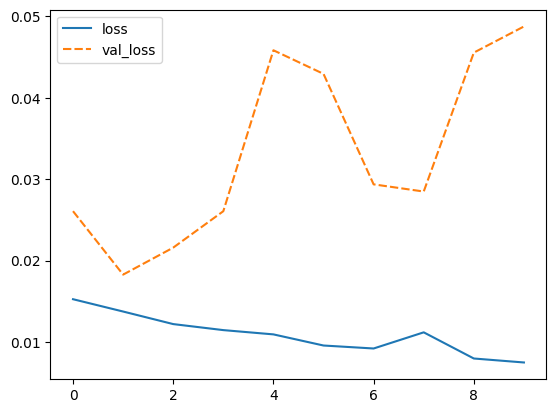

In [103]:
sns.set_style()
sns.lineplot(data=history_df[['loss', 'val_loss']])

<Axes: >

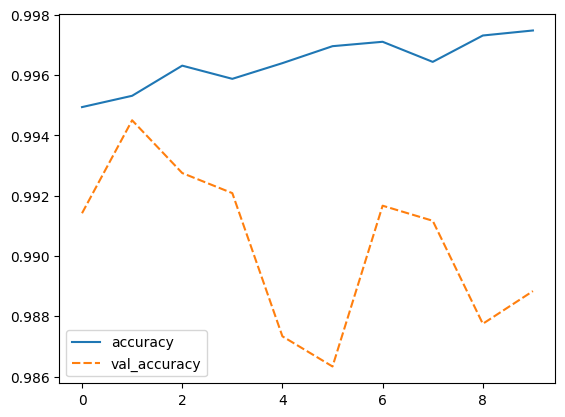

In [104]:
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])